<a href="https://colab.research.google.com/github/LubangaD/169240/blob/main/169240_D_Lubanga_DSA8203_HW2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME**: *DERRICK* *LUBANGA*<br>
**REG NUMBER** *169240*<br>
**TASK** *Homework 2.*<br>

The main  Objective is to use data science techniques to uncover insights and design solutions related to the job market in Ivory coast in employment sector, specifically focusing on youth employment (15-35 years).

In [ ]:
#Include libraries to be used
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px



**What sort of issues are there in your data? What cleanup was required?**
1.   Understanding the data interms of the variables and meaning. How can I use the metrics to come up with meaning analysis
2.   Column Renaming

3. Filtering Data for Côte d'Ivoire

4. Standardization of Classification and Sex Labels: standardizing the labels for classification and sex to a consistent format.

5. Selection of Relevant Columns

6. Selection of Ivory Coast Data from the Population Dataset

7. Pivoting Population Data: It pivots the population dataset to convert it into a long format for merging with the unemployment dataset.

8. Merging Datasets

9. Calculation of Total Unemployed Population

10. Column Renaming After Merge: It renames the columns resulting from the merge operation for clarity.

11. Calculation of Average Unemployed Population: I calculated the average of the total unemployed population for each year.


**Create a function that accepts the raw data after it has been loaded and returns the cleaned-up data.**

In [ ]:
def process_data(unemployment_url, population_url):
    # Read datasets
    df = pd.read_csv(unemployment_url)
    population_df = pd.read_excel(population_url, engine='openpyxl')

    # Rename columns
    df = df.rename(columns={
        'ref_area.label': 'country',
        'indicator.label': 'indicator',
        'source.label': 'source',
        'sex.label': 'sex',
        'classif1.label': 'classification',
        'time': 'Year',
        'obs_value': 'observed value',
        'obs_status.label': 'status'
    })

    # Filter data for Côte d'Ivoire
    df2 = df[df['country'] == "Côte d'Ivoire"]
    ivorycoast = df2[df2['classification'].isin(['Age (Youth, adults): 15-24', 'Age (Youth, adults): 25+'])]
    ivorycoast = ivorycoast[ivorycoast['sex'].isin(['Sex: Male','Sex: Female'])]
    ivorycoast['classification'] = ivorycoast['classification'].replace({'Age (Youth, adults): 25+':'25-35','Age (Youth, adults): 15-24':'15-24'}, regex=False).str.strip()
    ivorycoast['sex'] = ivorycoast['sex'].replace({'Sex: Male':'male','Sex: Female':'female'},regex=False).str.strip()
    ivorycoast_df= ivorycoast
    ivorycoast_df = ivorycoast_df.drop('status', axis=1)

    # Select only ivorycoast data from the population dataset
    ivorycoast_pop = population_df[population_df['Country Code'] == 'CIV']
    population_df= pd.DataFrame(ivorycoast_pop)

    # Perform pivoting
    finalp_df = population_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                        var_name='Year', value_name='Totalpop')
    finalp_df['Year'] = pd.to_numeric(finalp_df['Year'])

    # Merge the dataframes on 'Country Name' and 'Year'
    merged_df = pd.merge(ivorycoast_df, finalp_df, on=[ 'Year'], how='inner')

    # Perform the multiplication and create the new column 'totalunemployedp'
    merged_df['totalunemployedp'] = merged_df['observed value'] * merged_df['Totalpop']
    merged_df.rename(columns={'Country Name_x': 'Country Name', 'Country Name_y':'Country Name'}, inplace=True)

    # Calculate the average of totalunemployedp by Year
    average_unemployedp = merged_df.groupby('Year')['totalunemployedp'].mean().reset_index()

    # Return the clean datasets
    return finalp_df, merged_df

# Usage:
unemployment_url = "https://raw.githubusercontent.com/LubangaD/169240/main/unemployment.csv"
population_url = "https://github.com/LubangaD/169240/raw/main/Population.xlsx"
finalp_df, merged_df = process_data(unemployment_url, population_url)

# Now you can use finalp_df and merged_df as needed


**Highlight the top two or three visualizations that are relevant to your dataset.**



1.   'Average Unemployed Population Over the Years'
2.   'Population Over the Years'
3.   'Plot to fit line over the data. In my simple linear regresion model'



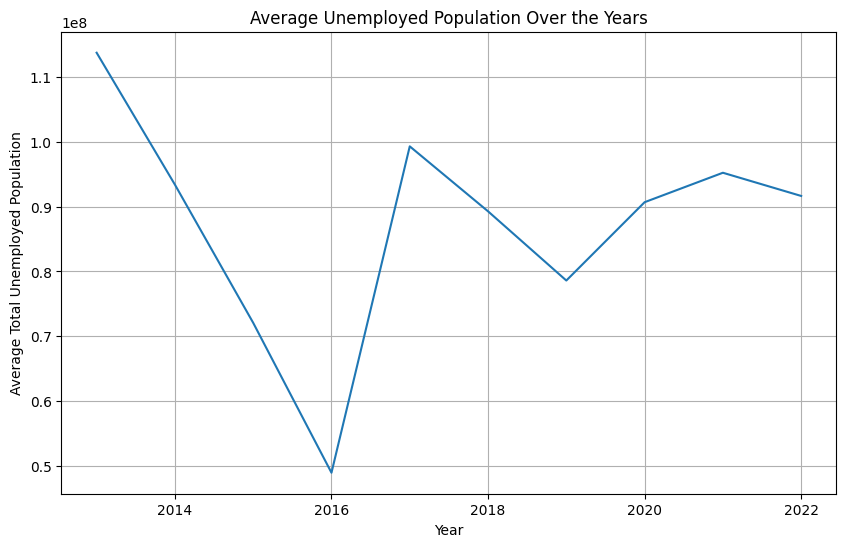

In [ ]:
# The average of totalunemployedp by Year
average_unemployedp = merged_df.groupby('Year')['totalunemployedp'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_unemployedp['Year'], average_unemployedp['totalunemployedp'])

plt.title('Average Unemployed Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Unemployed Population')
plt.grid(True)
plt.show()


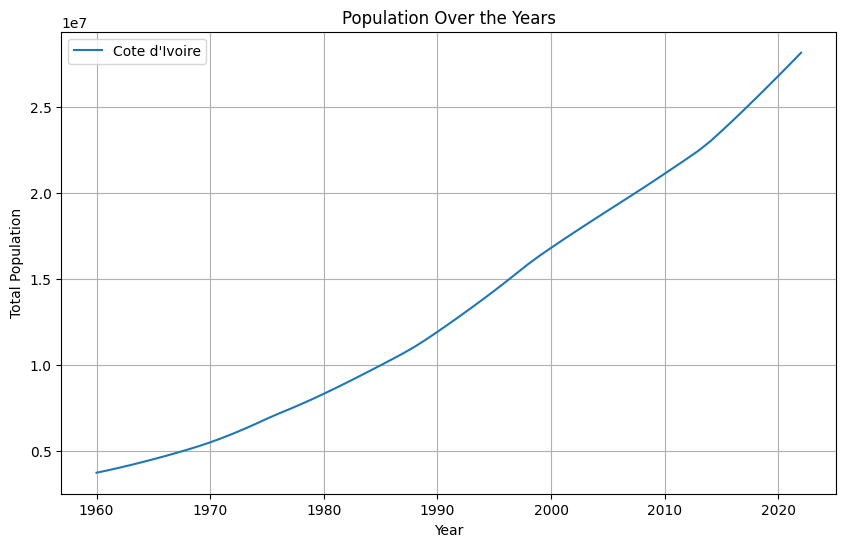

In [ ]:
#The population trend over time
# Convert 'Year' to numeric type
#finalp_df['Year'] = pd.to_numeric(finalp_df['Year'])

# Plotting
plt.figure(figsize=(10, 6))
for country, data in finalp_df.groupby('Country Name'):
    plt.plot(data['Year'], data['Totalpop'], label=country)

plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.grid(True)
plt.show()

**Create a supervised or unsupervised learning model from the data in your dataset.**

In [ ]:
emp=merged_df[['observed value','Totalpop'	,'totalunemployedp']]
msk = np.random.rand(len(merged_df)) < 0.8
train = emp[msk]
test = emp[~msk]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['observed value']])
train_y = np.asanyarray(train[['totalunemployedp']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[23474989.79905608]]
Intercept:  [4911902.34873883]


#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE).

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. *The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).*


In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['observed value']])
test_y = np.asanyarray(test[['totalunemployedp']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 7536679.54
Residual sum of squares (MSE): 111249682158906.88
R2-score: 0.89


Text(0, 0.5, 'totalunemployedp')

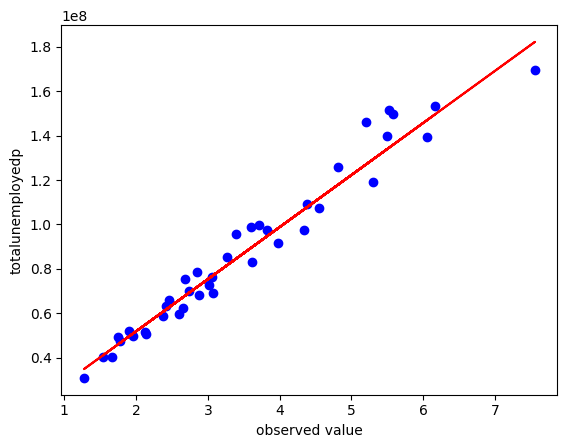

In [ ]:
#Plot to fit line over the data. In my simple linear regresion model'
plt.scatter(emp['observed value'], emp['totalunemployedp'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("observed value")
plt.ylabel("totalunemployedp")

**Summarize the insights gained and conclusions drawn (maximum three) from your dataset.**



**Unemployment Trends and Population Dynamics Over Time: A Summary**

The trends in unemployment rates and population dynamics offer valuable insights into the economic and social landscape of Côte d'Ivoire. Over recent years, noticeable patterns have emerged, indicating significant shifts and challenges:

1. **Unemployment Trends**:
   - From 2013 to 2016, Côte d'Ivoire experienced a notable surge in unemployment rates, reflecting economic fluctuations and potential challenges in employment opportunities during that period.
   - The years between 2018 and 2020 witnessed a substantial increase in unemployment levels globally, attributed largely to the impact of the COVID-19 pandemic. Côte d'Ivoire was not immune to this trend, experiencing a sharp rise in unemployment rates during this period.
   - However, from 2021 onwards, there has been a discernible downtrend in unemployment levels, suggesting potential recovery and stabilization in the labor market.

2. **Population Growth**:
   - Concurrently, Côte d'Ivoire has experienced consistent population growth over the years. The upward trajectory in population numbers signifies demographic changes and societal dynamics.
   - The steady increase in population contributes to the labor force pool, potentially influencing unemployment rates as more individuals enter the job market.

By examining the intertwined dynamics of unemployment trends and population growth, policymakers and stakeholders gain valuable insights into the challenges and opportunities within the Ivorian economy. Understanding these trends facilitates the development of targeted strategies aimed at promoting employment opportunities, fostering economic growth, and enhancing the well-being of the population.

